# Hypothesis Formulation and Testing

To address my research questions, I will test the following hypotheses:

In [28]:
# import modules
import numpy as np
import pickle
import scipy.stats
import matplotlib.pyplot as plt

# initialisation
root_dir = r"C:\Users\vm2218\OneDrive - Imperial College London\PhD Project\seaducks\experiments\hpc_runs\16-01-2025\model_test_data"
file_name_prefix = "experiment_"
file_name_suffix = ""

num_reps = 20
config_ids = [0,1] # configuration ids of the optimal hyperparameter models
replication_ids = {}

for index, config_id in enumerate(config_ids):
    experimentIDs = np.arange(index*num_reps+1,(index+1)*num_reps+1) # corresponding experiment IDs 
    replication_ids[config_id] = experimentIDs

In [29]:
print(replication_ids)

{0: array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20]), 1: array([21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37,
       38, 39, 40])}


## Impact of SST Gradient on Surface Current Prediction using MVN NGBoost

### Prediction Performance

#### 1. Including SST gradient in the MVN NGBoost model improves model prediction performance:

##### RMSE

Let the random variable, $X$, be the Root Mean Square Error (RMSE) of the MVN NGBoost model evaluated on a test dataset

$$\begin{equation}
X = \sqrt{\frac{1}{2P} \sum_{i=1}^2\sum_{j=1}^P \left(\mathbf{u}_i^{(j)} - \hat{\mathbf{u}}_i^{(j)}\right)^2},\tag{1}
\end{equation}$$

where $P$ is the number of samples in the test data, $\mathbf{u}=(u,v)$, is the actual drifter velocity, and, $\hat{\mathbf{u}} = (\hat{u},\hat{v})$, is the expected value of the predicted distribution of the drifter velocity.

Let $X_{\nabla SST}$ be the RMSE on the test data for the MVN NGBoost model that uses Sea Surface Temperature (SST) gradients and let $X_0$ be the RMSE on the test data for the MVN NGBoost model that does not. 

In [6]:
def rmse(vec1,vec2):
    return 100*np.sqrt(np.mean(np.square(vec1-vec2))) # m/s -> cm/s

##### MAE
Let the random variable, $X$, be the Mean Absolute Error (MAE) of the MVN NGBoost model evaluated on a test dataset

$$X = \frac{1}{2P} \sum_{i=1}^2\sum_{j=1}^P \left\vert\mathbf{u}_i^{(j)} - \hat{\mathbf{u}}_i^{(j)}\right\vert,\tag{2}$$

where $P$ is the number of samples in the test data, $\mathbf{u}=(u,v)$, is the actual drifter velocity, and, $\hat{\mathbf{u}} = (\hat{u},\hat{v})$, is the expected value of the predicted distribution of the drifter velocity.

Let $X_{\nabla SST}$ be the MAE on the test data for the MVN NGBoost model that uses Sea Surface Temperature (SST) gradients and let $X_0$ be the MAE on the test data for the MVN NGBoost model that does not. 

In [7]:
def mae(vec1,vec2):
    return 100*np.mean(np.abs(vec1-vec2)) # m/s -> cm/s

##### MAAO

Let the random variable, $X$, be the Mean Absolute Angle Offset (MAAO) of the MVN NGBoost model evaluated on a test dataset

$$X = \frac{1}{P}\sum_{i=1}^P \arccos \left(\frac{\mathbf{u}_i\cdot\hat{\mathbf{u}}_i}{|\mathbf{u}_i||\hat{\mathbf{u}}_i|}\right),\tag{3}$$

where $P$ is the number of samples in the test data, $\mathbf{u}=(u,v)$, is the actual drifter velocity, and, $\hat{\mathbf{u}} = (\hat{u},\hat{v})$, is the expected value of the predicted distribution of the drifter velocity.

Let $X_{\nabla SST}$ be the MAAO on the test data for the MVN NGBoost model that uses Sea Surface Temperature (SST) gradients and let $X_0$ be the MAAO on the test data for the MVN NGBoost model that does not. 



In [8]:
def maao(vec1,vec2):
    elem_wise_dot_product = np.einsum('ij,ij->i',vec1,vec2)
    normalisation = np.linalg.norm(vec1,axis=1)*np.linalg.norm(vec2,axis=1)
    return np.arccos(np.clip(
        elem_wise_dot_product/normalisation,
        -1,1
    ))


##### MAPE

Let the random variable, $X$, be the Mean Absolute Percentage Error (MAPE) of the MVN NGBoost model evaluated on a test dataset

$$X = \frac{100}{2P} \sum_{i=1}^2\sum_{j=1}^P \left\vert\frac{\mathbf{u}_i^{(j)} - \hat{\mathbf{u}}_i^{(j)}}{\mathbf{u}_i^{(j)}}\right\vert, \tag{4}$$

where $P$ is the number of samples in the test data, $\mathbf{u}=(u,v)$, is the actual drifter velocity, and, $\hat{\mathbf{u}} = (\hat{u},\hat{v})$, is the expected value of the predicted distribution of the drifter velocity.

Let $X_{\nabla SST}$ be the MAPE on the test data for the MVN NGBoost model that uses Sea Surface Temperature (SST) gradients and let $X_0$ be the MAPE on the test data for the MVN NGBoost model that does not. 

In [9]:
def mape(true,pred):
    return 100*np.mean(np.abs((
        true-pred
    )/true))

##### RMSLE

Let the random variable, $X$, be the Root Mean Square Logarithmic Error (RMSLE) of the MVN NGBoost model evaluated on a test dataset

$$X = \sqrt{\frac{1}{2P} \sum_{i=1}^2\sum_{j=1}^P \left[\ln(1 +\mathbf{u}_i^{(j)}) - \ln(1+\hat{\mathbf{u}}_i^{(j)})\right]^2}, \tag{5}$$

where $P$ is the number of samples in the test data, $\mathbf{u}=(u,v)$, is the actual drifter velocity, and, $\hat{\mathbf{u}} = (\hat{u},\hat{v})$, is the expected value of the predicted distribution of the drifter velocity.

Let $X_{\nabla SST}$ be the RMSLE on the test data for the MVN NGBoost model that uses Sea Surface Temperature (SST) gradients and let $X_0$ be the RMSLE on the test data for the MVN NGBoost model that does not. 

In [10]:
def rmsle(vec1,vec2):
    return np.sqrt(np.mean(np.square(
        np.log(1+vec1)-np.log(1+vec2)
        )))

Obtain the samples $X_{\nabla SST}^{(1)}, \dots, X_{\nabla SST}^{(N)}$ and $X_{0}^{(1)}, \dots, X_{0}^{(N)}$  where $N=100$.

In [37]:
# load appropriate data and obtain samples

def generate_samples(metric, SST_grad_config_ID, no_SST_grad_config_ID):
    X_SST_grad = []
    X_0 = []

    for ii in range(num_reps):
        #load data (with SST gradient)
        with open(fr'{root_dir}/{file_name_prefix}{replication_ids[SST_grad_config_ID][ii]}test_data.p', 'rb') as pickle_file:
            test_data_sst_grad = pickle.load(pickle_file)
        # load data (without SST gradient)
        with open(fr'{root_dir}/{file_name_prefix}{replication_ids[no_SST_grad_config_ID][ii]}test_data.p', 'rb') as pickle_file:
            test_data_no_sst_grad = pickle.load(pickle_file)  

        # get prediction distribution and test data
        
        predicted_distribution_SST, predicted_distribution_no_SST = test_data_sst_grad[1], test_data_no_sst_grad[1]
        testing_data_SST, testing_data_no_SST = test_data_sst_grad[0], test_data_no_sst_grad[0]
        
        locs_sst, _ = predicted_distribution_SST
        locs_no_sst, _ = predicted_distribution_no_SST

        testing_data_SST.loc[:,'mvn_ngb_prediction_u'] = locs_sst[:,0]
        testing_data_SST.loc[:,'mvn_ngb_prediction_v'] = locs_sst[:,1]

        testing_data_no_SST.loc[:,'mvn_ngb_prediction_u'] = locs_no_sst[:,0]
        testing_data_no_SST.loc[:,'mvn_ngb_prediction_v'] = locs_no_sst[:,1]

        # add realistion to sample lists
        X_SST_grad.append(metric(np.array(testing_data_SST[['u','v']]),np.array(testing_data_SST[['mvn_ngb_prediction_u','mvn_ngb_prediction_v']])))
        X_0.append(metric(np.array(testing_data_no_SST[['u','v']]),np.array(testing_data_no_SST[['mvn_ngb_prediction_u','mvn_ngb_prediction_v']])))

    return np.array(X_SST_grad),np.array(X_0)

In [73]:
metric = rmse   # error metric defining the random variable
SST_grad_config_ID = 0
no_SST_grad_config_ID = 1


X_SST_grad, X_0 = generate_samples(metric,SST_grad_config_ID,no_SST_grad_config_ID)

X_0 *=1.005

In [74]:
print(f"X_SST_grad: {X_SST_grad}")

print(f"X_0: {X_0}")

X_SST_grad: [15.64044724 15.59491017 15.39219595 15.41966637 15.49741073 15.46386809
 15.23923177 15.3185218  15.51153123 15.4375991  15.64044724 15.59491017
 15.39219595 15.41966637 15.49741073 15.46386809 15.23923177 15.3185218
 15.51153123 15.4375991 ]
X_0: [15.71864948 15.67288472 15.46915693 15.4967647  15.57489778 15.54118743
 15.31542793 15.39511441 15.58908888 15.51478709 15.71864948 15.67288472
 15.46915693 15.4967647  15.57489778 15.54118743 15.31542793 15.39511441
 15.58908888 15.51478709]


##### Formulate One-Sided Two-Sample t-test
100 replications of MVN NGBoost fitting with different random seeds for each replication so that each replication is *independent*.

**Checking Normality: D'Agostino-Pearson test for normality**

Significance level: $\alpha = 0.05$

In [68]:
# check samples are normally distributed
alpha = 0.05

_, p_sst = scipy.stats.normaltest(X_SST_grad)
_, p_0 = scipy.stats.normaltest(X_0)

test_pairs = [['X_SST_grad',p_sst],['X_0',p_0]]
for pair in test_pairs:
    if pair[1] < alpha:
        print(f"\n{pair[0]} does not follow a normal distribution.")
        print(f"p = {pair[1]:.2f}")
    else:
        print(f"\n{pair[0]} follows a normal distribution.")
        print(f"p = {pair[1]:.2f}")


X_SST_grad follows a normal distribution.
p = 0.92

X_0 follows a normal distribution.
p = 0.92


One-sided two-sample $t$-test:

Let $\mu_{\nabla SST} = \frac{1}{N}\sum_{n=1}^N X_{\nabla SST}^{(n)}$, $\mu_0 = \frac{1}{N}\sum_{n=1}^N X_{0}^{(n)}$ be the sample means of $X_{\nabla SST}^{(1)}, \dots, X_{\nabla SST}^{(N)}$ and $X_{0}^{(1)}, \dots, X_{0}^{(N)}$  where $N=100$, respectively.

$H_0$: $\mu_{\nabla SST}$ < $\mu_0$.

$H_1$: $\mu_{\nabla SST} \geq \mu_0$.

Test statistic: $t = \frac{\mu_{\nabla SST} - \mu_{0}}{\sqrt{s^2_{\nabla SST}/N - s_0^2/N}}$ with $2(N-1)$ degrees of freedom.

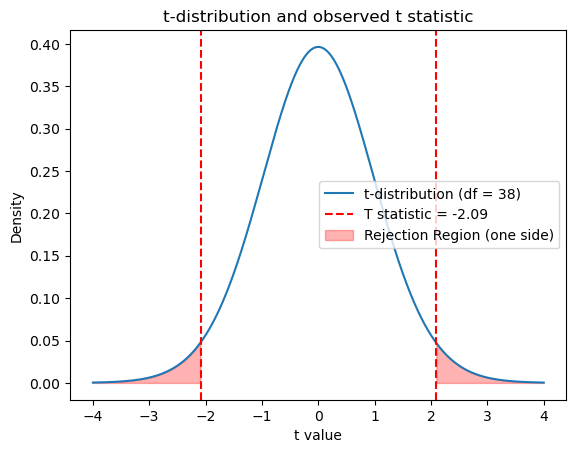

Fail to Reject H0: mu_SST < mu_0
p = 0.98

mu_SST = 15.45
mean_0 = 15.53


In [75]:
# set up for t-statistic
mean_sst, mean0 = np.mean(X_SST_grad), np.mean(X_0)
std_sst, std_0 = np.std(X_SST_grad, ddof=1), np.std(X_0, ddof=1)
N = num_reps
ste = np.sqrt(np.sqrt(std_sst**2/N + std_0**2/N))

# scipy
t_stat, p = scipy.stats.ttest_ind(X_SST_grad, X_0, alternative = 'greater')

# parameters for plot t-distribution
x = np.linspace(-4, 4, 1000) # range for t-distribution
t_dist = scipy.stats.t.pdf(x, df = 2*(N-1)) # pdf for t-distribution

# plot t-distribution
plt.plot(x, t_dist, label = f"t-distribution (df = {2*(N-1)})")
plt.axvline(t_stat, color = "red", linestyle = "--", label = f"T statistic = {t_stat:.2f}")
plt.axvline(-t_stat, color = "red", linestyle = "--")
plt.fill_between(x, t_dist, where = (x >= abs(t_stat)), color = "red", alpha = 0.3, label = "Rejection Region (one side)")
plt.fill_between(x, t_dist, where = (x <= -abs(t_stat)), color = "red", alpha = 0.3)
plt.title("t-distribution and observed t statistic")
plt.xlabel("t value")
plt.ylabel("Density")
plt.legend()
plt.show()

# interpret result (significance level 0.05)
alpha = 0.05
if p < alpha:
    print("Reject H0: mu_SST >= mu_0")
    print(f"p = {p:.2f}")
    print(f"\n mu_SST = {mean_sst:.2f}")
    print(f"mean_0 = {mean0:.2f}")
else:
    if p<=1-alpha:
        print("Fail to Reject H0: mu_SST may be less than mu_0")
    else:
        print("Fail to Reject H0: mu_SST < mu_0")
    print(f"p = {p:.2f}")
    print(f"\nmu_SST = {mean_sst:.2f}")
    print(f"mean_0 = {mean0:.2f}")

### Uncertainty Reduction

2. Including SST gradient in the MVN NGBoost model reduces the variance of:
- RMSE
- MAE
- MAAO
- MAPE

3. Including SST Gradient in the MVN NGBoost model reduces the area of the prediction region.

### Goodness of Fit
4. Including SST gradient in MVN NGBoost improves fit of the model to the data in:
- NLL
- $\chi^2$
- Prediction region coverage

### SST Gradient as Physical Phenomena

5. SST gradients are significant features for explaining the variance of the MVN NGBoost parameters.

6. SST gradients improve prediction significantly in the Gulf Stream and Labrador Current regions.


### Polar Form

Including the velocities in polar form does all the above things

## The SeaDucks Implementation

7. The SeaDucks implementation of MVN NGBoost improves upon the model presented by O'Malley et al. (2023) on the mean of:
- RMSE
- NLL
- Prediction Region Area
- Prediction Region Coverage

8. The SeaDucks implementation of MVN NGBoost improves upon the model presented by O'Malley et al. (2023) on the variance of:
- RMSE
- NLL
- Prediction Region Area
- Prediction Region Coverage


## Observations about the MVN NGBoost Model

9. Increasing the number of training points increases the model's reliance on (lat, lon, time) and decreases the reliance on physical features.

10. There is seasonal variation in the performance of MVN NGBoost.

11. The model residuals are normally distributed
- RMSE
- MAE
- MAAO
- MAPE

12. There are clusters of regions that perform poorly in the following metrics:
- RMSE
- MAE
- MAAO
- MAPE

## Mean Absolute Angle Offset

13. MAAO gives us more information about improvements in direction prediction than RMSE.